## Load and Inspect Data

In [48]:
# Import necessary libraries
import pandas as pd

# Load datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays = pd.read_csv('../data/holidays_events.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

# Check first few rows of each dataset
print("Train DataFrame:")
print(df_train.head(), "\n")

print("Test DataFrame:")
print(df_test.head(), "\n")

print("Stores DataFrame:")
print(df_stores.head(), "\n")

print("Oil DataFrame:")
print(df_oil.head(), "\n")

print("Holidays DataFrame:")
print(df_holidays.head(), "\n")

print("Transactions DataFrame:")
print(df_transactions.head(), "\n")

# Check for missing values in each dataset
print("Missing values in Train Data:")
print(df_train.isnull().sum(), "\n")

print("Missing values in Test Data:")
print(df_test.isnull().sum(), "\n")

print("Missing values in Stores Data:")
print(df_stores.isnull().sum(), "\n")

print("Missing values in Oil Data:")
print(df_oil.isnull().sum(), "\n")

print("Missing values in Holidays Data:")
print(df_holidays.isnull().sum(), "\n")

print("Missing values in Transactions Data:")
print(df_transactions.isnull().sum(), "\n")

# Convert date columns to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Confirm the conversion of date columns
print("Date columns converted to datetime format.")

Train DataFrame:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0 

Test DataFrame:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0 

Stores DataFrame:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2  

In [30]:
# Display all columns of a DataFrame
pd.set_option('display.max_columns', None)

## Create Date-Based Features

In [49]:
# Feature Engineering: Date-based features
def create_date_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_year'] = df['date'].dt.dayofyear
    return df

# Apply the function to both train and test datasets
df_train = create_date_features(df_train)
df_test = create_date_features(df_test)

# Confirm the newly created features
print("Train DataFrame with Date-Based Features:")
print(df_train.head())

print("Test DataFrame with Date-Based Features:")
print(df_test.head())

Train DataFrame with Date-Based Features:
   id       date  store_nbr      family  sales  onpromotion  year  month  day   
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1  \
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   day_of_week  week_of_year  day_of_year  
0            1             1            1  
1            1             1            1  
2            1             1            1  
3            1             1            1  
4            1             1            1  
Test DataFrame with Date-Based Features:
        id       date  store_nbr      family  onpromotion  year  month  day   
0  3000888 2017-08-16          1  AUTOMOTIVE            0  2017      8   16  \
1  30008

##  Create Lag and Rolling Features

In [50]:
# Feature Engineering: Lag and rolling features for sales
def create_lag_features(df, lags=[1, 7, 14]):
    for lag in lags:
        df[f'sales_lag_{lag}'] = df.groupby(['store_nbr', 'family'])['sales'].shift(lag)
    return df

def create_rolling_features(df, windows=[7, 14]):
    for window in windows:
        df[f'sales_roll_mean_{window}'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window).mean())
        df[f'sales_roll_std_{window}'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window).std())

        df[f'sales_roll_mean_{window}'] = df[f'sales_roll_mean_{window}'].shift(1)
        df[f'sales_roll_std_{window}'] = df[f'sales_roll_std_{window}'].shift(1) 

    return df

# Apply the lag features to the train dataset
df_train = create_lag_features(df_train)
df_train = create_rolling_features(df_train)

# Since the test set lacks sales history, we can't create lag features for it directly
# Fill missing lag feature NaNs with 0
df_train.fillna(0, inplace=True)

# Confirm the newly created lag and rolling features
print("Train DataFrame with Lag and Rolling Features:")
print(df_train.head())

Train DataFrame with Lag and Rolling Features:
   id       date  store_nbr      family  sales  onpromotion  year  month  day   
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1  \
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   day_of_week  week_of_year  day_of_year  sales_lag_1  sales_lag_7   
0            1             1            1          0.0          0.0  \
1            1             1            1          0.0          0.0   
2            1             1            1          0.0          0.0   
3            1             1            1          0.0          0.0   
4            1             1            1          0.0          0.0   

   sales_lag_14  sales_roll_mean_7  sal

## Handle missing data

In [51]:
# Handle missing oil prices using forward fill
df_oil['dcoilwtico'].fillna(method='ffill', inplace=True)

# Check if there are any remaining missing values in oil
print("Remaining missing values in oil data:")
print(df_oil.isnull().sum())

# Ensure lag and rolling feature NaNs in train data are filled (we already did this in the previous step)
df_train.fillna(0, inplace=True)

# Confirm no missing values in train data
print("Remaining missing values in train data after filling:")
print(df_train.isnull().sum())

# Since the test set doesn't have historical sales, we won't create lag/rolling features for it. 
# However, ensure there are no other missing values in the test dataset.
df_test.fillna(0, inplace=True)
print("Remaining missing values in test data after filling:")
print(df_test.isnull().sum())

# Handle the last remaining missing oil price using backward fill
df_oil['dcoilwtico'].fillna(method='bfill', inplace=True)

# Verify there are no more missing values in the oil data
print("Remaining missing values in oil data after backfill:")
print(df_oil.isnull().sum())

Remaining missing values in oil data:
date          0
dcoilwtico    1
dtype: int64
Remaining missing values in train data after filling:
id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
month                 0
day                   0
day_of_week           0
week_of_year          0
day_of_year           0
sales_lag_1           0
sales_lag_7           0
sales_lag_14          0
sales_roll_mean_7     0
sales_roll_std_7      0
sales_roll_mean_14    0
sales_roll_std_14     0
dtype: int64
Remaining missing values in test data after filling:
id              0
date            0
store_nbr       0
family          0
onpromotion     0
year            0
month           0
day             0
day_of_week     0
week_of_year    0
day_of_year     0
dtype: int64
Remaining missing values in oil data after backfill:
date          0
dcoilwtico    0
dtype: int64


## Add Holiday Feature

In [52]:
# Handle holiday data: create a flag for holidays and calculate days to next holiday
def add_holiday_features(df, holidays_df):
    # Filter national holidays only
    holidays_df = holidays_df[holidays_df['locale'] == 'National'].copy()
    
    # Merge holidays with the data based on the date
    df = df.merge(holidays_df[['date', 'type']], on='date', how='left')
    
    # Flag if the date is a holiday
    df['is_holiday'] = df['type'].notnull().astype(int)
    
    # Drop the 'type' column after creating the flag
    df.drop(columns=['type'], inplace=True)
    
    return df

# Apply holiday features to train and test datasets
df_train = add_holiday_features(df_train, df_holidays)
df_test = add_holiday_features(df_test, df_holidays)

# Confirm that the holiday feature was added
print("Train DataFrame with Holiday Features:")
print(df_train[['date', 'is_holiday']].head())

print("Test DataFrame with Holiday Features:")
print(df_test[['date', 'is_holiday']].head())

Train DataFrame with Holiday Features:
        date  is_holiday
0 2013-01-01           1
1 2013-01-01           1
2 2013-01-01           1
3 2013-01-01           1
4 2013-01-01           1
Test DataFrame with Holiday Features:
        date  is_holiday
0 2017-08-16           0
1 2017-08-16           0
2 2017-08-16           0
3 2017-08-16           0
4 2017-08-16           0


## Add Promotion Features

In [53]:
# Create time since the last promotion for each store and family
def create_time_since_last_promotion(df):
    df['promo_not_active'] = (df['onpromotion'] == 0).astype(int)
    
    # Calculate the cumulative sum of days since the last promotion within each store and product family
    df['time_since_last_promo'] = df.groupby(['store_nbr', 'family'])['promo_not_active'].cumsum()
    
    # Drop the helper column 'promo_not_active'
    df.drop(columns=['promo_not_active'], inplace=True)
    
    return df

# Apply to train dataset (test set doesn't have sales history, so we skip promotions there)
df_train = create_time_since_last_promotion(df_train)

# Confirm the new promotion-related feature in the train dataset
print("Train DataFrame with Promotion Features:")
print(df_train[['date', 'store_nbr', 'family', 'onpromotion', 'time_since_last_promo']].head())

Train DataFrame with Promotion Features:
        date  store_nbr      family  onpromotion  time_since_last_promo
0 2013-01-01          1  AUTOMOTIVE            0                      1
1 2013-01-01          1   BABY CARE            0                      1
2 2013-01-01          1      BEAUTY            0                      1
3 2013-01-01          1   BEVERAGES            0                      1
4 2013-01-01          1       BOOKS            0                      1


## Model Training

In [54]:
# Merge oil data into the train dataset based on date
df_train = df_train.merge(df_oil[['date', 'dcoilwtico']], on='date', how='left')

# Merge transactions data into the train dataset based on date and store number
df_train = df_train.merge(df_transactions[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')

# Fill any remaining NaN values in dcoilwtico and transactions
df_train['dcoilwtico'].fillna(0, inplace=True)
df_train['transactions'].fillna(0, inplace=True)

# Verify that the columns are present after merging
print(df_train[['date', 'store_nbr', 'dcoilwtico', 'transactions']].head())

        date  store_nbr  dcoilwtico  transactions
0 2013-01-01          1       93.14           0.0
1 2013-01-01          1       93.14           0.0
2 2013-01-01          1       93.14           0.0
3 2013-01-01          1       93.14           0.0
4 2013-01-01          1       93.14           0.0


In [13]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Define features to be used in the model
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
            'day_of_week', 'week_of_year', 'day_of_year', 'time_since_last_promo', 
            'is_holiday']

# Prepare the feature matrix and target variable
X = df_train[features]
y = df_train['sales']

# Use TimeSeriesSplit for cross-validation (to ensure future data isn't used in the past)
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation results
rmsle_list = []

# Loop through each split in the cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    
    # Set LightGBM parameters
    params = {
        'objective': 'regression',
        'metric': 'rmse',  # LightGBM uses RMSE by default, but we calculate RMSLE manually
        'boosting_type': 'gbdt',
        'learning_rate': 0.01,
        'num_leaves': 50,
        'max_depth': -1,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 1,
        'random_state': 42
    }
    
    # Use callbacks for early stopping and logging
    callbacks = [
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
    
    # Train the model with early stopping callbacks
    model = lgb.train(params, train_data, valid_sets=[val_data], num_boost_round=1000, callbacks=callbacks)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    
    # Calculate RMSLE on validation set
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    rmsle_list.append(rmsle)
    
    print(f"Validation RMSLE: {rmsle}")

# Average RMSLE across all splits
avg_rmsle = np.mean(rmsle_list)
print(f"Average RMSLE across all splits: {avg_rmsle}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 501336, number of used features: 9
[LightGBM] [Info] Start training from score 207.328590
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 873.135
[200]	valid_0's rmse: 868.169
[300]	valid_0's rmse: 866.702
[400]	valid_0's rmse: 866.205
[500]	valid_0's rmse: 866.082
[600]	valid_0's rmse: 865.975
Early stopping, best iteration is:
[577]	valid_0's rmse: 865.968
Validation RMSLE: 3.5074939804486225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

In [9]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Define features to be used in the model
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
            'day_of_week', 'week_of_year', 'day_of_year', 'time_since_last_promo', 
            'is_holiday']

# Prepare the feature matrix and target variable
X = df_train[features]
y = df_train['sales']

# Use TimeSeriesSplit for cross-validation (to ensure future data isn't used in the past)
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation results
rmsle_list = []

# Loop through each split in the cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create XGBoost DMatrix for training and validation
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    
    # Set XGBoost parameters
    params = {
        'objective': 'reg:squarederror',  # For regression tasks
        'eval_metric': 'rmse',  # XGBoost uses RMSE by default, but we'll calculate RMSLE manually
        'learning_rate': 0.01,
        'max_depth': 6,  # Adjust based on need
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42
    }
    
    # Use early stopping and evaluation metric
    evals = [(val_data, 'eval')]
    
    # Train the model with early stopping
    model = xgb.train(params, train_data, num_boost_round=1000, evals=evals, 
                      early_stopping_rounds=50, verbose_eval=100)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(val_data)
    y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    
    # Calculate RMSLE on validation set
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    rmsle_list.append(rmsle)
    
    print(f"Validation RMSLE: {rmsle}")

# Average RMSLE across all splits
avg_rmsle = np.mean(rmsle_list)
print(f"Average RMSLE across all splits: {avg_rmsle}")


[0]	eval-rmse:892.85284
[100]	eval-rmse:873.53355
[200]	eval-rmse:868.42512
[300]	eval-rmse:866.87999
[400]	eval-rmse:866.20040
[500]	eval-rmse:865.93973
[600]	eval-rmse:865.83017
[700]	eval-rmse:865.81602
[792]	eval-rmse:865.85104
Validation RMSLE: 3.4820364812192417
[0]	eval-rmse:1015.83582
[100]	eval-rmse:826.47211
[200]	eval-rmse:770.78405
[300]	eval-rmse:752.55934
[400]	eval-rmse:743.11703
[500]	eval-rmse:737.95254
[600]	eval-rmse:736.37416
[700]	eval-rmse:734.90697
[776]	eval-rmse:735.03366
Validation RMSLE: 2.5330911497641857
[0]	eval-rmse:1203.78852
[100]	eval-rmse:926.05059
[200]	eval-rmse:846.64142
[300]	eval-rmse:825.38438
[400]	eval-rmse:820.90227
[457]	eval-rmse:821.58520
Validation RMSLE: 2.25501229300417
[0]	eval-rmse:1263.59560
[100]	eval-rmse:941.81189
[200]	eval-rmse:846.72869
[300]	eval-rmse:817.44165
[400]	eval-rmse:807.26374
[500]	eval-rmse:799.15321
[600]	eval-rmse:796.67303
[700]	eval-rmse:793.37191
[800]	eval-rmse:791.95003
[900]	eval-rmse:791.67398
[960]	eval-r

## Enhancing feature engineering

In [55]:
import numpy as np

# 1.1 Create additional lag features for 30, 60, and 90 days
def create_additional_lag_features(df, lags=[30, 60, 90]):
    for lag in lags:
        df[f'sales_lag_{lag}'] = df.groupby(['store_nbr', 'family'])['sales'].shift(lag)
    return df

# 1.2 Create cyclic features for day_of_week and day_of_year
def create_cyclic_features(df):
    # Cyclic transformation of day_of_week
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Cyclic transformation of day_of_year
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    
    return df

# Apply the additional lag features to the train dataset
df_train = create_additional_lag_features(df_train)

# Apply the cyclic transformations to the train dataset
df_train = create_cyclic_features(df_train)

# Fill missing values resulting from lag feature creation
df_train.fillna(0, inplace=True)

# Verify that the new features are created
print("Train DataFrame with additional lag and cyclic features:")
print(df_train[['sales_lag_30', 'sales_lag_60', 'sales_lag_90', 'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos']].head())

Train DataFrame with additional lag and cyclic features:
   sales_lag_30  sales_lag_60  sales_lag_90  day_of_week_sin  day_of_week_cos   
0           0.0           0.0           0.0         0.781831          0.62349  \
1           0.0           0.0           0.0         0.781831          0.62349   
2           0.0           0.0           0.0         0.781831          0.62349   
3           0.0           0.0           0.0         0.781831          0.62349   
4           0.0           0.0           0.0         0.781831          0.62349   

   day_of_year_sin  day_of_year_cos  
0         0.017213         0.999852  
1         0.017213         0.999852  
2         0.017213         0.999852  
3         0.017213         0.999852  
4         0.017213         0.999852  


## Update model training with new features

In [11]:
# Define features to be used in the model
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
            'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
            'week_of_year', 'time_since_last_promo', 'is_holiday', 
            'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_30', 
            'sales_lag_60', 'sales_lag_90']

# Prepare the feature matrix and target variable
X = df_train[features]
y = df_train['sales']

# Use TimeSeriesSplit for cross-validation (to ensure future data isn't used in the past)
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation results
rmsle_list = []

# Loop through each split in the cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create XGBoost DMatrix for training and validation
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    
    # Set XGBoost parameters
    params = {
        'objective': 'reg:squarederror',  # For regression tasks
        'eval_metric': 'rmse',  # XGBoost uses RMSE by default, but we'll calculate RMSLE manually
        'learning_rate': 0.01,
        'max_depth': 6,  # Adjust based on need
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42
    }
    
    # Use early stopping and evaluation metric
    evals = [(val_data, 'eval')]
    
    # Train the model with early stopping
    model = xgb.train(params, train_data, num_boost_round=1000, evals=evals, 
                      early_stopping_rounds=50, verbose_eval=100)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(val_data)
    y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    
    # Calculate RMSLE on validation set
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    rmsle_list.append(rmsle)
    
    print(f"Validation RMSLE: {rmsle}")

# Average RMSLE across all splits
avg_rmsle = np.mean(rmsle_list)
print(f"Average RMSLE across all splits: {avg_rmsle}")


[0]	eval-rmse:885.46177
[100]	eval-rmse:418.06724
[200]	eval-rmse:285.66900
[300]	eval-rmse:255.53610
[400]	eval-rmse:250.17450
[500]	eval-rmse:249.67890
[529]	eval-rmse:249.70700
Validation RMSLE: 1.1273291221105495
[0]	eval-rmse:1010.47053
[100]	eval-rmse:445.41271
[200]	eval-rmse:280.45143
[300]	eval-rmse:245.75743
[400]	eval-rmse:239.87237
[500]	eval-rmse:240.20091
[509]	eval-rmse:240.32230
Validation RMSLE: 1.0696780195125
[0]	eval-rmse:1198.11960
[100]	eval-rmse:549.00100
[200]	eval-rmse:346.33024
[300]	eval-rmse:293.09404
[400]	eval-rmse:278.60461
[500]	eval-rmse:273.92766
[600]	eval-rmse:272.49116
[700]	eval-rmse:271.47293
[800]	eval-rmse:270.93345
[900]	eval-rmse:270.31185
[999]	eval-rmse:270.00846
Validation RMSLE: 0.7173376103548883
[0]	eval-rmse:1258.28815
[100]	eval-rmse:601.08218
[200]	eval-rmse:417.26564
[300]	eval-rmse:380.37974
[400]	eval-rmse:373.76452
[500]	eval-rmse:372.43849
[600]	eval-rmse:372.04571
[700]	eval-rmse:372.16598
[703]	eval-rmse:372.15354
Validation RM

## Hyperparameter Tuning using RandomizedSearchCV

In [12]:
# Import necessary libraries
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import warnings

# Suppress warnings from XGBoost
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Check for zero or negative sales values
def check_for_zero_negative_sales(df, target_column='sales'):
    num_invalid_sales = df[df[target_column] <= 0].shape[0]
    if num_invalid_sales > 0:
        print(f"Number of zero or negative sales: {num_invalid_sales}")
    else:
        print("No zero or negative sales found.")
    return num_invalid_sales

# Step 2: Handle zero or negative sales (either filter them or adjust by adding a constant)
def handle_zero_negative_sales(df, method='filter'):
    if method == 'filter':
        # Filter out zero or negative sales
        df_filtered = df[df['sales'] > 0]
        print(f"Filtered out rows with zero or negative sales. Remaining rows: {df_filtered.shape[0]}")
        return df_filtered
    elif method == 'add_constant':
        # Add a small constant to avoid zero or negative sales
        df['sales_adjusted'] = df['sales'] + 1
        print("Added constant of 1 to avoid zero or negative sales.")
        return df

# Step 3: Custom RMSLE scorer that clips negative predictions
def rmsle_scorer(y_true, y_pred):
    # Clip any negative predictions to 0 to avoid errors
    y_pred = np.clip(y_pred, a_min=0, a_max=None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Step 4: Perform Hyperparameter Tuning with RandomizedSearchCV
def perform_hyperparameter_tuning(X, y):
    # Ensure no zero or negative values in y before proceeding
    if (y <= 0).any():
        raise ValueError("Detected zero or negative values in target variable, can't proceed with RMSLE.")

    # Define the cleaned-up parameter grid for XGBoost
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'lambda': [0, 0.1, 1],  # L2 regularization
        'alpha': [0, 0.1, 1]  # L1 regularization
    }

    # Initialize XGBoost regressor
    xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=1000)

    # Custom RMSLE scorer with clipping
    rmsle = make_scorer(rmsle_scorer, greater_is_better=False)

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgboost_model,
        param_distributions=param_grid,
        n_iter=20,
        scoring=rmsle,  # Use custom RMSLE scorer
        cv=3,  # 3-fold cross-validation
        verbose=1,  # Set verbosity to 1 for progress updates
        random_state=42,
        n_jobs=-1
    )

    # Perform the random search on the filtered training data
    random_search.fit(X, y)

    # Output the best parameters and the corresponding RMSLE score
    print("Best hyperparameters:", random_search.best_params_)
    print("Best score (RMSLE):", np.sqrt(-random_search.best_score_))

# Step 5: Clip negative model predictions
def clip_predictions(predictions):
    return np.clip(predictions, a_min=0, a_max=None)

# Step 6: Prepare and run everything
# Check for zero or negative sales in the training data
check_for_zero_negative_sales(df_train)

# Handle zero or negative sales based on the chosen method (either filter or add_constant)
df_train_cleaned = handle_zero_negative_sales(df_train, method='filter')

# Prepare feature matrix and target variable for training
X_filtered = df_train_cleaned[features]  # Assuming features list is defined earlier
y_filtered = df_train_cleaned['sales']

# Step 7: Ensure all target values are positive before proceeding
try:
    if (y_filtered <= 0).any():
        raise ValueError("Zero or negative values found in the target data!")

    # Print statistics on the target variable
    print(f"Min sales value: {y_filtered.min()}, Max sales value: {y_filtered.max()}")
    
    # Perform hyperparameter tuning
    perform_hyperparameter_tuning(X_filtered, y_filtered)
    
except ValueError as e:
    print(f"Error: {e}")


Number of zero or negative sales: 940483
Filtered out rows with zero or negative sales. Remaining rows: 2067533
Min sales value: 0.122, Max sales value: 124717.0
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 1, 'colsample_bytree': 0.9, 'alpha': 0}
Best score (RMSLE): 1.0191310843272157


## FURTHER IMPROVEMENTS

In [56]:
# Drop existing 'cluster' column if it exists
if 'cluster' in df_train.columns:
    df_train.drop(columns=['cluster'], inplace=True)

if 'cluster' in df_test.columns:
    df_test.drop(columns=['cluster'], inplace=True)

# Now merge the 'cluster' information from df_stores
df_train = df_train.merge(df_stores[['store_nbr', 'cluster']], on='store_nbr', how='left')
df_test = df_test.merge(df_stores[['store_nbr', 'cluster']], on='store_nbr', how='left')

# Check if the cluster is merged correctly
print("Cluster column in train data:")
print(df_train[['store_nbr', 'cluster']].head())

print("Cluster column in test data:")
print(df_test[['store_nbr', 'cluster']].head())

# Add interaction between promotion and holiday, and promotion and store cluster
df_train['promo_holiday'] = df_train['onpromotion'] * df_train['is_holiday']
df_train['store_cluster_promo'] = df_train['onpromotion'] * df_train['cluster']

df_test['promo_holiday'] = df_test['onpromotion'] * df_test['is_holiday']
df_test['store_cluster_promo'] = df_test['onpromotion'] * df_test['cluster']

# Check if the new features are added
print("New interaction features in train data:")
print(df_train[['promo_holiday', 'store_cluster_promo']].head())

print("New interaction features in test data:")
print(df_test[['promo_holiday', 'store_cluster_promo']].head())

Cluster column in train data:
   store_nbr  cluster
0          1       13
1          1       13
2          1       13
3          1       13
4          1       13
Cluster column in test data:
   store_nbr  cluster
0          1       13
1          1       13
2          1       13
3          1       13
4          1       13
New interaction features in train data:
   promo_holiday  store_cluster_promo
0              0                    0
1              0                    0
2              0                    0
3              0                    0
4              0                    0
New interaction features in test data:
   promo_holiday  store_cluster_promo
0              0                    0
1              0                    0
2              0                   26
3              0                  260
4              0                    0


In [57]:
def create_lag_features(df, lags=[1, 7, 14, 30, 60, 90, 180]):
    for lag in lags:
        df[f'sales_lag_{lag}'] = df.groupby(['store_nbr', 'family'])['sales'].shift(lag)
    return df

# Apply lag features to the train dataset only
df_train = create_lag_features(df_train)

# In the test dataset, we won't have 'sales' data for lag features,
# so fill missing lag values with 0 or any default value you want.
df_test.fillna(0, inplace=True)

# Check if the lag features are correctly applied in df_train
print("Train data with lag features:")
print(df_train[['store_nbr', 'family', 'sales', 'sales_lag_1', 'sales_lag_7', 'sales_lag_14']].head())

# If you still want to include lag features in the test set,
# you can use forward-fill based on the last available training data
# or initialize them with 0 for predictions (depending on your approach).

Train data with lag features:
   store_nbr      family  sales  sales_lag_1  sales_lag_7  sales_lag_14
0          1  AUTOMOTIVE    0.0          NaN          NaN           NaN
1          1   BABY CARE    0.0          NaN          NaN           NaN
2          1      BEAUTY    0.0          NaN          NaN           NaN
3          1   BEVERAGES    0.0          NaN          NaN           NaN
4          1       BOOKS    0.0          NaN          NaN           NaN


In [58]:
# Define a function to calculate days to next holiday and days since last holiday
def add_holiday_distance_features(df, holidays_df):
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    holidays_df = holidays_df[holidays_df['transferred'] == False]

    # Create a list of unique holiday dates
    holiday_dates = holidays_df['date'].unique()

    df['days_until_next_holiday'] = df['date'].apply(lambda x: min((holiday_dates - x).days) if x < max(holiday_dates) else 0)
    df['days_since_last_holiday'] = df['date'].apply(lambda x: min((x - holiday_dates).days) if x > min(holiday_dates) else 0)
    
    return df

# Apply the holiday distance features to the train and test datasets
df_train = add_holiday_distance_features(df_train, df_holidays)
df_test = add_holiday_distance_features(df_test, df_holidays)

In [59]:
# Create cyclic features for day of year and day of week
df_train['day_of_year_sin'] = np.sin(2 * np.pi * df_train['day_of_year'] / 365)
df_train['day_of_year_cos'] = np.cos(2 * np.pi * df_train['day_of_year'] / 365)
df_train['day_of_week_sin'] = np.sin(2 * np.pi * df_train['day_of_week'] / 7)
df_train['day_of_week_cos'] = np.cos(2 * np.pi * df_train['day_of_week'] / 7)

df_test['day_of_year_sin'] = np.sin(2 * np.pi * df_test['day_of_year'] / 365)
df_test['day_of_year_cos'] = np.cos(2 * np.pi * df_test['day_of_year'] / 365)
df_test['day_of_week_sin'] = np.sin(2 * np.pi * df_test['day_of_week'] / 7)
df_test['day_of_week_cos'] = np.cos(2 * np.pi * df_test['day_of_week'] / 7)

In [47]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'day_of_week', 'week_of_year', 'day_of_year',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_roll_mean_7',
       'sales_roll_std_7', 'sales_roll_mean_14', 'sales_roll_std_14',
       'is_holiday', 'time_since_last_promo', 'dcoilwtico_x', 'transactions_x',
       'sales_lag_30', 'sales_lag_60', 'sales_lag_90', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
       'promo_holiday', 'store_cluster_promo', 'sales_lag_180',
       'days_until_next_holiday', 'days_since_last_holiday',
       'sales_roll_mean_30', 'sales_roll_std_30', 'sales_roll_mean_60',
       'sales_roll_std_60', 'sales_roll_mean_90', 'sales_roll_std_90',
       'sales_roll_mean_180', 'sales_roll_std_180', 'dcoilwtico_y',
       'transactions_y', 'cluster'],
      dtype='object')

In [60]:
# Create rolling mean and standard deviation features for different window sizes
def create_rolling_features(df, windows=[7, 14, 30, 60, 90, 180]):
    for window in windows:
        df[f'sales_roll_mean_{window}'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window).mean())
        df[f'sales_roll_std_{window}'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window).std())

        df[f'sales_roll_mean_{window}'] = df[f'sales_roll_mean_{window}'].shift(1)
        df[f'sales_roll_std_{window}'] = df[f'sales_roll_std_{window}'].shift(1) 
    return df

# Apply rolling features to the training data
df_train = create_rolling_features(df_train)

# Since there are no sales data in the test set, fill missing rolling feature values with 0
df_test.fillna(0, inplace=True)

# Now define your features, ensuring the new rolling features are included
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day',
            'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
            'week_of_year', 'time_since_last_promo', 'is_holiday',
            'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_30',
            'sales_lag_60', 'sales_lag_90', 'sales_roll_mean_30', 'sales_roll_std_30',
            'sales_roll_mean_90', 'sales_roll_std_90', 'sales_roll_mean_180', 'sales_roll_std_180']

# Prepare the feature matrix and target variable
X = df_train[features]
y = df_train['sales']

In [18]:
# Import necessary libraries
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize lists to store evaluation results
rmsle_list = []

# Loop through each split in the cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create XGBoost DMatrix for training and validation
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    
    # Set XGBoost parameters
    params = {
        'objective': 'reg:squarederror',  # For regression tasks
        'eval_metric': 'rmse',  # We will calculate RMSLE manually
        'learning_rate': 0.01,
        'max_depth': 6,  # Can adjust depending on use case
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42
    }
    
    # Train the model with early stopping
    model = xgb.train(params, train_data, num_boost_round=1000, evals=[(val_data, 'eval')],
                      early_stopping_rounds=50, verbose_eval=100)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(val_data)
    y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Ensure no negative predictions
    
    # Calculate RMSLE on validation set
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    rmsle_list.append(rmsle)
    
    print(f"Validation RMSLE: {rmsle}")

# Average RMSLE across all splits
avg_rmsle = np.mean(rmsle_list)
print(f"Average RMSLE across all splits: {avg_rmsle}")


[0]	eval-rmse:885.41828
[100]	eval-rmse:430.93362
[200]	eval-rmse:321.35680
[300]	eval-rmse:308.03753
[352]	eval-rmse:309.26445
Validation RMSLE: 1.6563226066087233
[0]	eval-rmse:1010.32312
[100]	eval-rmse:442.37613
[200]	eval-rmse:277.80510
[300]	eval-rmse:243.81919
[400]	eval-rmse:238.61146
[500]	eval-rmse:238.13127
[525]	eval-rmse:238.58211
Validation RMSLE: 1.0100946840410792
[0]	eval-rmse:1198.13813
[100]	eval-rmse:545.55447
[200]	eval-rmse:341.88945
[300]	eval-rmse:285.75625
[400]	eval-rmse:270.57978
[500]	eval-rmse:266.22832
[600]	eval-rmse:264.59201
[700]	eval-rmse:263.53974
[800]	eval-rmse:262.74543
[900]	eval-rmse:261.77356
[999]	eval-rmse:261.37378
Validation RMSLE: 0.6453804957966125
[0]	eval-rmse:1258.33476
[100]	eval-rmse:601.56899
[200]	eval-rmse:415.84025
[300]	eval-rmse:377.65526
[400]	eval-rmse:370.71831
[500]	eval-rmse:369.26091
[600]	eval-rmse:368.97093
[700]	eval-rmse:368.83270
[800]	eval-rmse:368.59289
[855]	eval-rmse:368.61340
Validation RMSLE: 0.5882817007876213

## Feature Engineering: Seasonality and Interaction Features

In [125]:
import numpy as np

# Cyclic features for day of week and day of year
def add_cyclic_features(df):
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    return df

# Apply to both train and test datasets
df_train = add_cyclic_features(df_train)
df_test = add_cyclic_features(df_test)

# Add interaction between promotion and holiday, and promotion and store cluster
df_train['promo_holiday'] = df_train['onpromotion'] * df_train['is_holiday']
df_train['store_cluster_promo'] = df_train['onpromotion'] * df_train['cluster']

df_test['promo_holiday'] = df_test['onpromotion'] * df_test['is_holiday']
df_test['store_cluster_promo'] = df_test['onpromotion'] * df_test['cluster']

# Updated feature list to include cyclic and interaction features
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
            'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
            'week_of_year', 'time_since_last_promo', 'is_holiday', 
            'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_30', 
            'sales_lag_60', 'sales_lag_90',
            'promo_holiday', 'store_cluster_promo']

# Prepare the feature matrix and target variable
df_pre = df_train.dropna()
X = df_pre[features]
y = df_pre['sales']

## Regularization Tuning: Fine-tune L1 and L2 Regularization

In [62]:
# Import necessary libraries
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error

# Set XGBoost parameters with fine-tuned regularization
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 8,  # Equivalent to 'num_leaves' in LightGBM
    'min_child_weight': 50,  # Equivalent to 'min_data_in_leaf'
    'alpha': 0.1,  # L1 regularization, equivalent to 'lambda_l1' in LightGBM
    'lambda': 1,   # L2 regularization, equivalent to 'lambda_l2' in LightGBM
    'subsample': 0.8,  # Equivalent to 'bagging_fraction'
    'colsample_bytree': 0.9,  # Equivalent to 'feature_fraction'
    'random_state': 42
}

# Train the model using TimeSeriesSplit and XGBoost
tscv = TimeSeriesSplit(n_splits=5)
rmsle_list = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Create DMatrix for XGBoost
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)

    # Train the model with early stopping
    model = xgb.train(params, train_data, num_boost_round=1000, evals=[(val_data, 'eval')],
                      early_stopping_rounds=50, verbose_eval=100)

    # Predictions and RMSLE Calculation
    y_val_pred = model.predict(val_data)
    y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Clip negative predictions

    rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
    rmsle_list.append(rmsle)
    print(f"Validation RMSLE: {rmsle}")

# Average RMSLE across all splits
avg_rmsle = np.mean(rmsle_list)
print(f"Average RMSLE across all splits: {avg_rmsle}")


[0]	eval-rmse:949.80929
[100]	eval-rmse:406.28136
[200]	eval-rmse:246.15858
[300]	eval-rmse:212.63207
[400]	eval-rmse:205.42821
[500]	eval-rmse:203.59594
[567]	eval-rmse:203.77714
Validation RMSLE: 1.1426936215684775
[0]	eval-rmse:1023.58944
[100]	eval-rmse:442.29542
[200]	eval-rmse:275.28285
[300]	eval-rmse:244.43598
[400]	eval-rmse:240.86809
[465]	eval-rmse:240.91757
Validation RMSLE: 1.1480656500129958
[0]	eval-rmse:1232.54218
[100]	eval-rmse:545.94000
[200]	eval-rmse:335.96333
[300]	eval-rmse:285.46569
[400]	eval-rmse:275.07152
[500]	eval-rmse:272.42781
[600]	eval-rmse:271.85233
[700]	eval-rmse:271.52452
[800]	eval-rmse:271.25131
[900]	eval-rmse:271.11765
[999]	eval-rmse:270.91182
Validation RMSLE: 0.6393807727077319
[0]	eval-rmse:1292.61936
[100]	eval-rmse:624.75979
[200]	eval-rmse:441.81659
[300]	eval-rmse:403.08069
[400]	eval-rmse:395.04356
[500]	eval-rmse:392.58569
[600]	eval-rmse:391.37211
[700]	eval-rmse:390.77514
[800]	eval-rmse:390.43337
[900]	eval-rmse:390.24843
[999]	eval

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle= False, test_size= 39)

# Create DMatrix for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train)
val_data = xgb.DMatrix(X_val, label=y_val)

# Set XGBoost parameters with fine-tuned regularization
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 8,  # Equivalent to 'num_leaves' in LightGBM
    'min_child_weight': 50,  # Equivalent to 'min_data_in_leaf'
    'alpha': 0.1,  # L1 regularization, equivalent to 'lambda_l1' in LightGBM
    'lambda': 1,   # L2 regularization, equivalent to 'lambda_l2' in LightGBM
    'subsample': 0.8,  # Equivalent to 'bagging_fraction'
    'colsample_bytree': 0.9,  # Equivalent to 'feature_fraction'
    'random_state': 42
}

# Train the model with early stopping
model_2 = xgb.train(params, train_data, num_boost_round=1000, evals=[(val_data, 'eval')],
                      early_stopping_rounds=50, verbose_eval=100)

# Predictions and RMSLE Calculation
y_train_pred = model_2.predict(train_data)
y_train_pred = np.clip(y_train_pred, a_min=0, a_max=None)  # Clip negative predictions

y_val_pred = model_2.predict(val_data)
y_val_pred = np.clip(y_val_pred, a_min=0, a_max=None)  # Clip negative predictions

rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
print(f"Training RMSLE: {rmsle_train}")
print(f"Validation RMSLE: {rmsle_val}")

[0]	eval-rmse:1330.66132
[100]	eval-rmse:556.59827
[200]	eval-rmse:285.03930
[300]	eval-rmse:193.74218
[400]	eval-rmse:168.85094
[500]	eval-rmse:160.96172
[600]	eval-rmse:157.49677
[649]	eval-rmse:157.97013
Training RMSLE: 0.7601254171307757
Validation RMSLE: 0.38854605708494677


In [130]:
y_train_all = y_train.to_frame().rename(columns= {'sales': 'true'})
y_train_all['pred'] = y_train_pred

y_val_all = y_val.to_frame().rename(columns= {'sales': 'true'})
y_val_all['pred'] = y_val_pred

y_all = pd.concat([y_train_all, y_val_all], axis= 0)
index = df_pre.index
y_all['id']= index
y_all = y_all.reset_index()
y_all = y_all.set_index('id')

stores = df_pre['store_nbr'].to_frame()
family = df_pre['family'].to_frame()

y_all['store_nbr'] = stores['store_nbr']
y_all['family'] = family['family']

In [95]:
def create_ts_dic(data):

    group = data.groupby(['store_nbr', 'family'])

    #create dic
    dic_groups = {}

    #feature engineering of data frames
    for (store, family), df in group:

        #check if store already in dic
        if store not in dic_groups:
            dic_groups[store] = {}

        #store df in nested dic
        dic_groups[store][family] = df
    
    return dic_groups

In [132]:
dic_groups = create_ts_dic(y_all)

In [139]:
#plot results for store and family

def plot_results(dic_pred, store, family, interval = 100, val_size=39):

    """Function to plot MAE values for train and val series and graph 
        with true and predicted values
    """

    df = dic_pred[store][family]
    
    df_train = df[:-val_size]
    df_val = df[-val_size:]

    train_true = df_train['true']
    train_pred = df_train['pred']
    val_true = df_val['true']
    val_pred = df_val['pred']

    # plotting for illustration
    plot_series(train_true[-interval:], train_pred[-interval:], val_true, val_pred, labels=["train TRUE", "train PRED", "val TRUE", "val PRED"])
    plt.title(f"Store-no.: {store} \n Product family: {family}")

In [137]:
family = list(df_train.family.unique())
stores = list(df_train.store_nbr.unique())

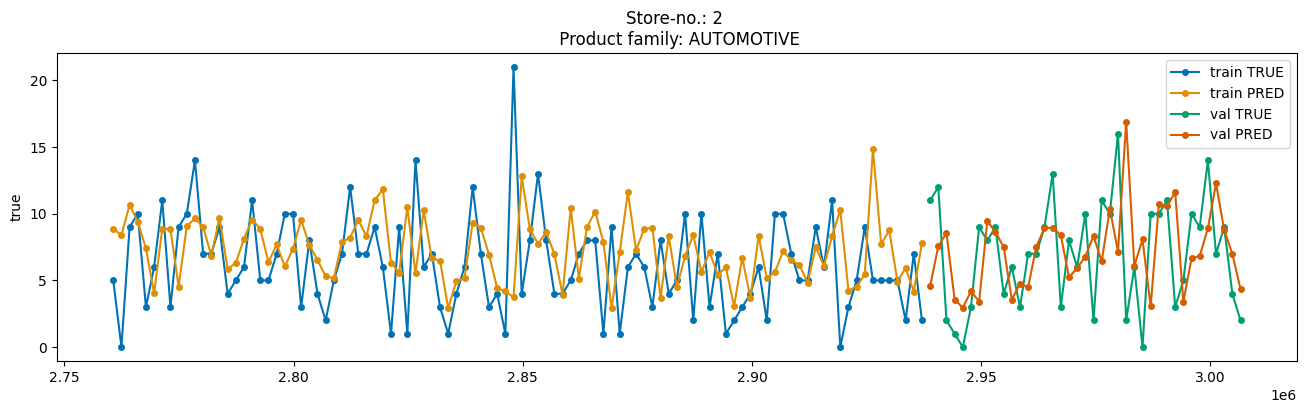

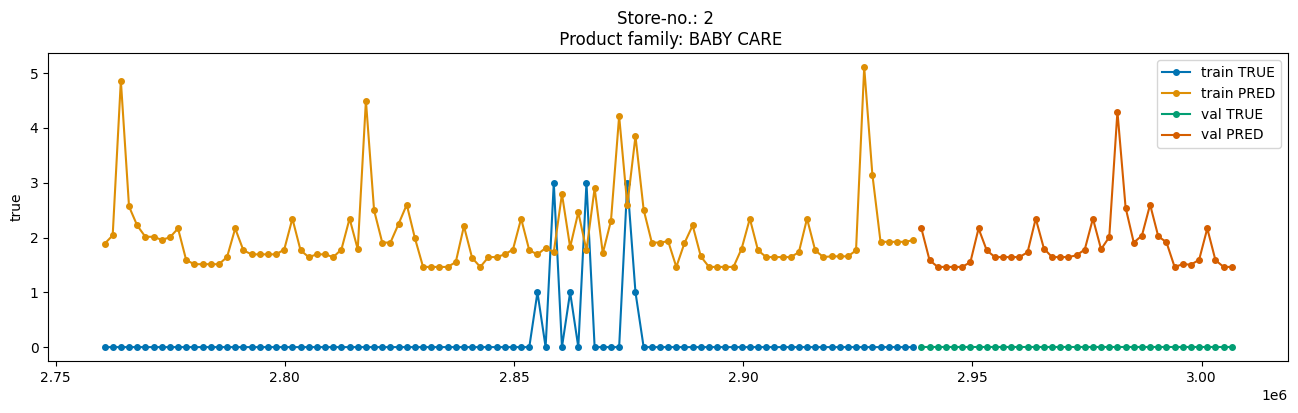

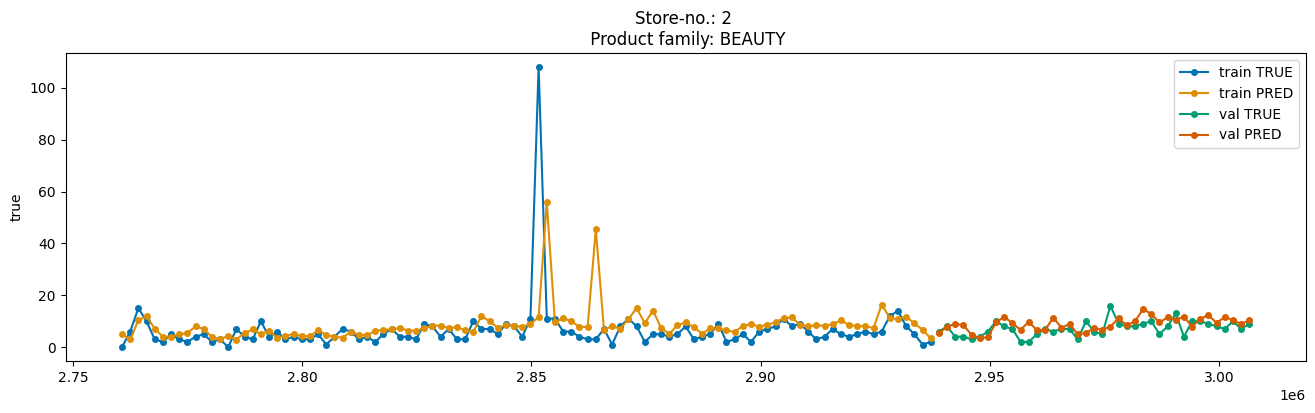

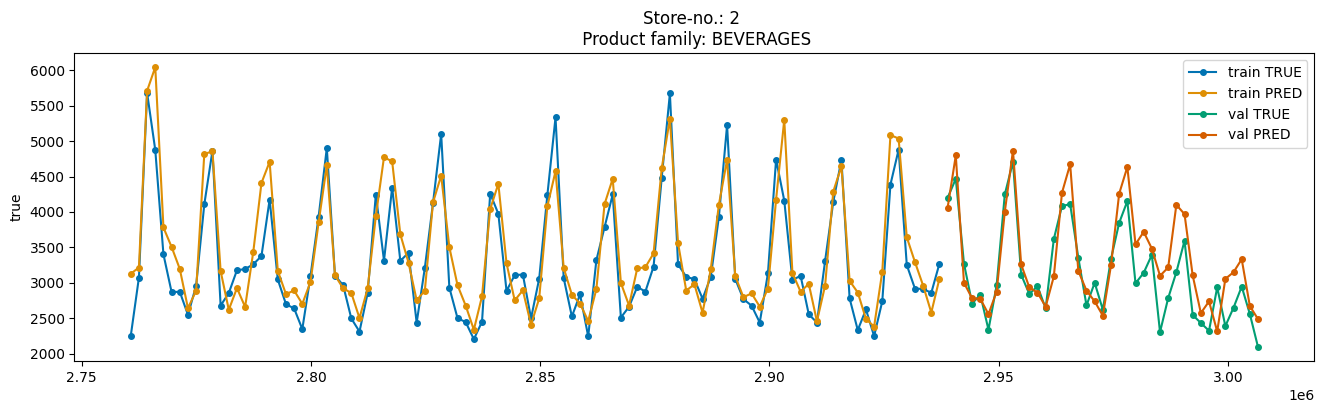

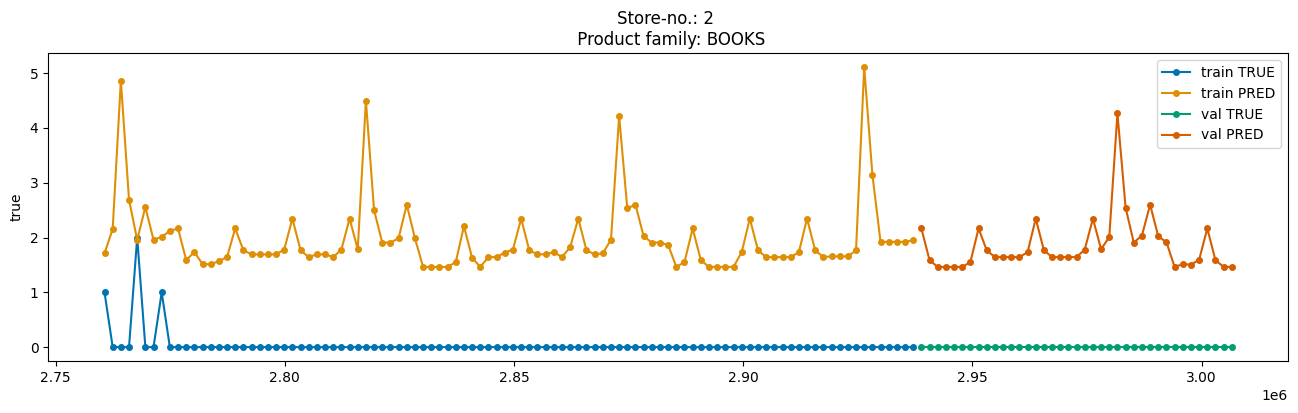

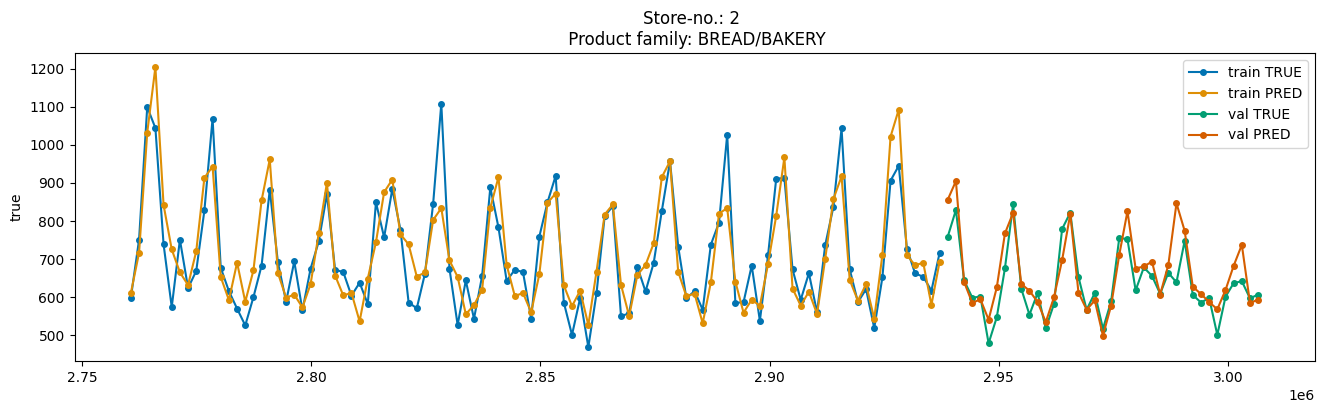

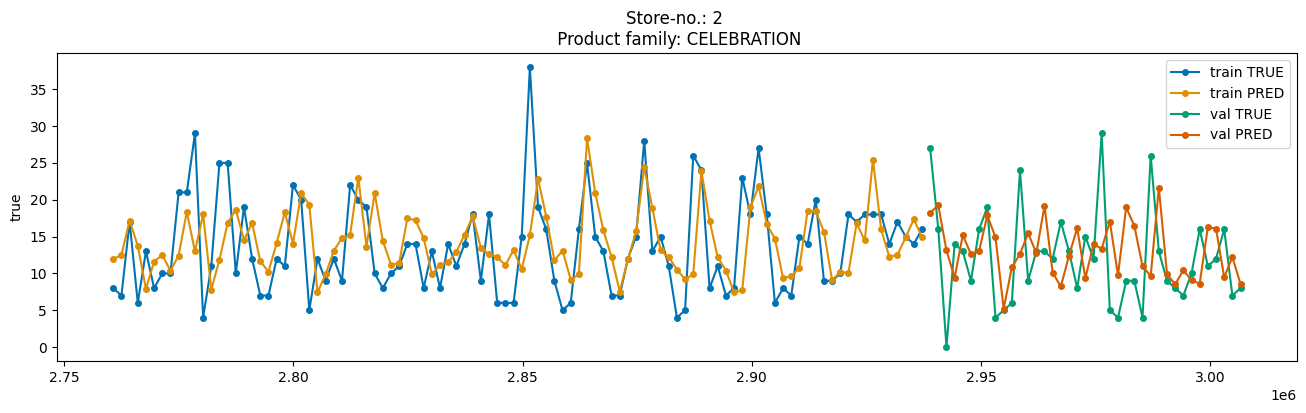

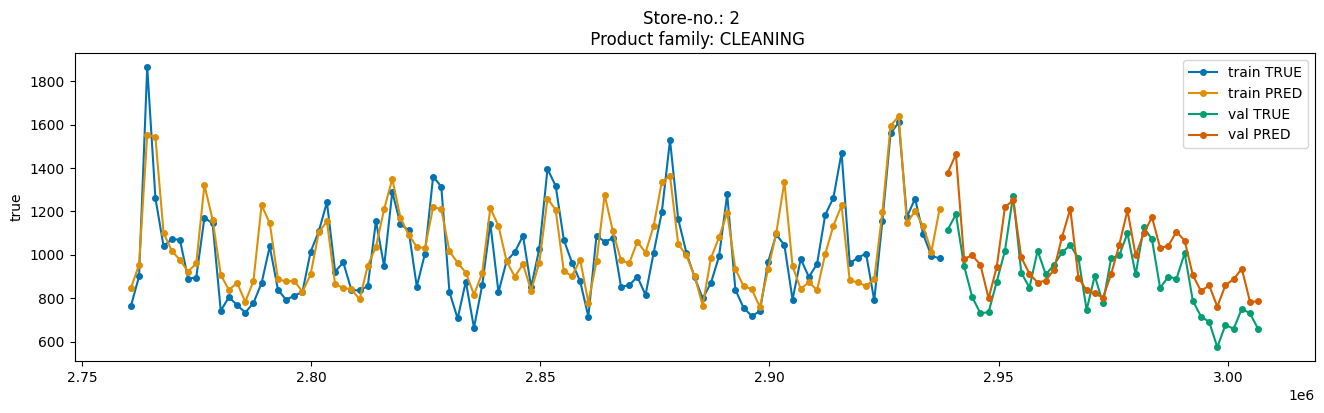

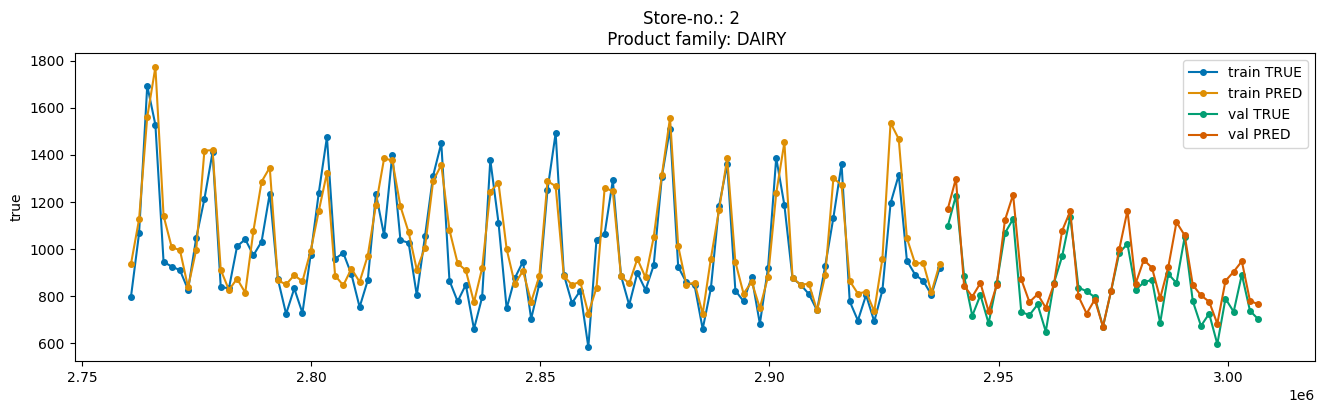

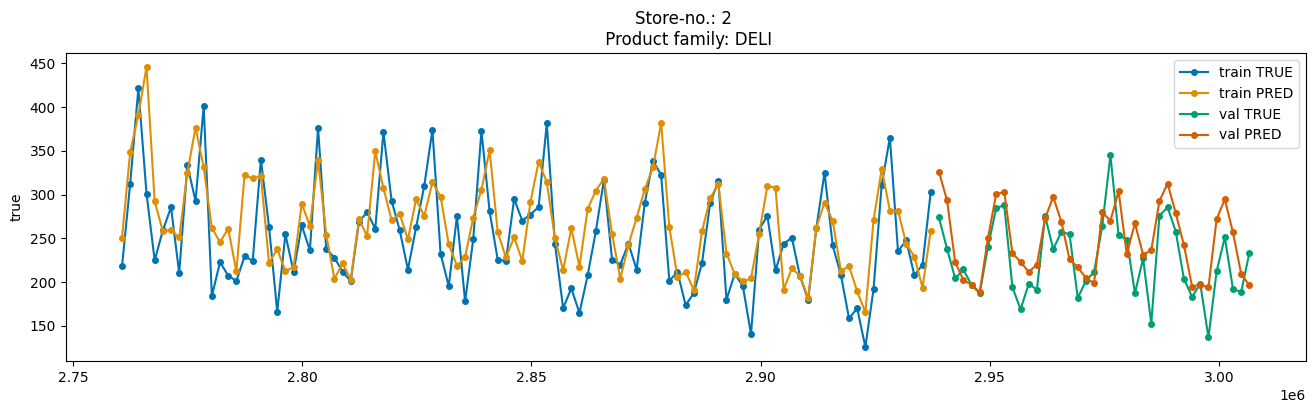

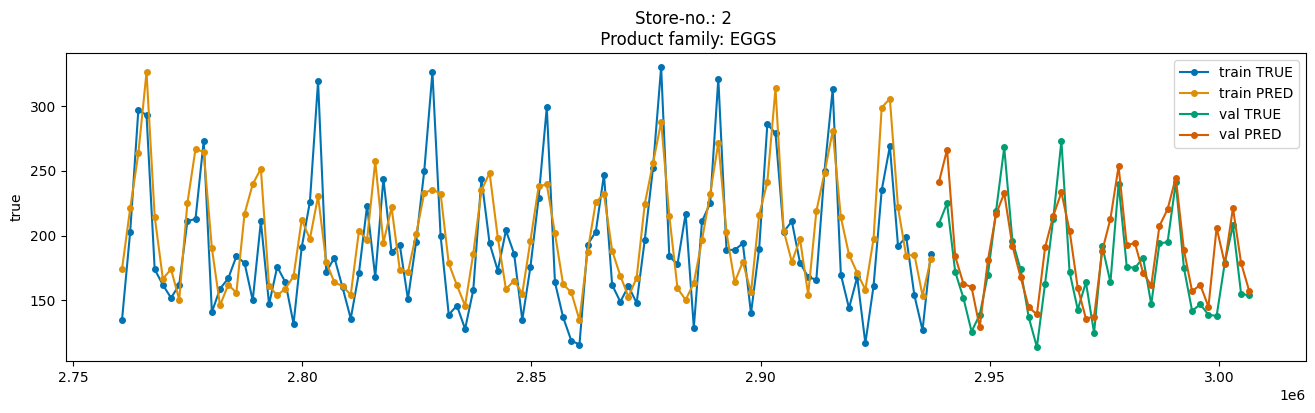

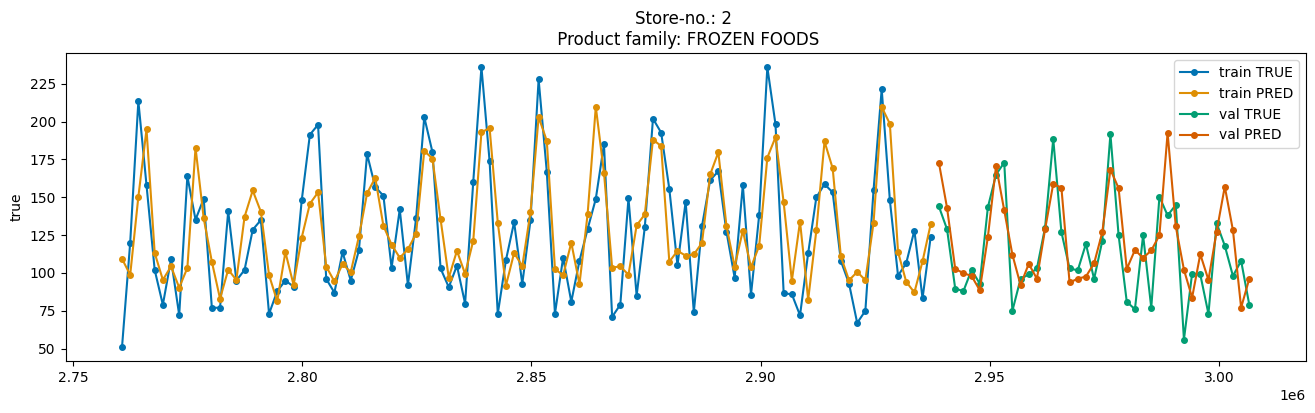

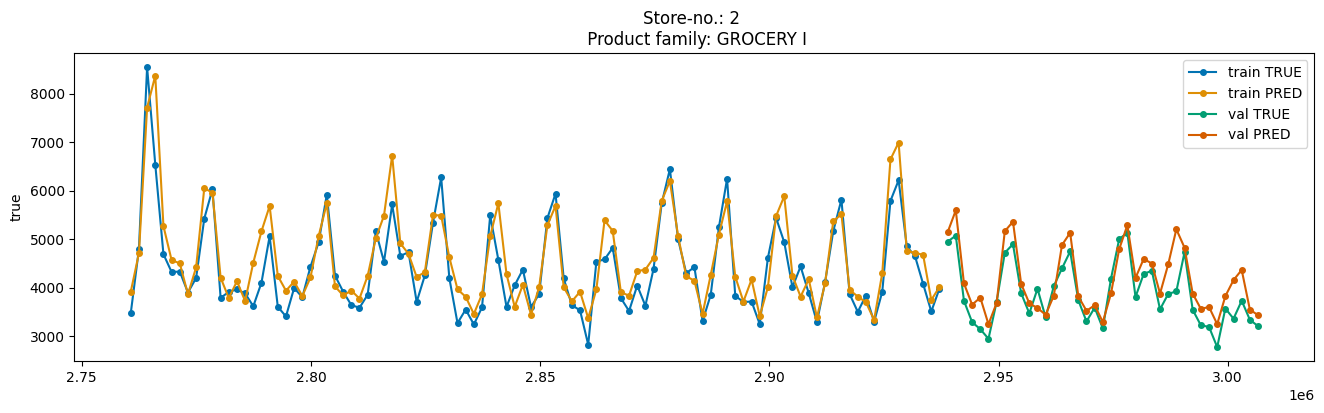

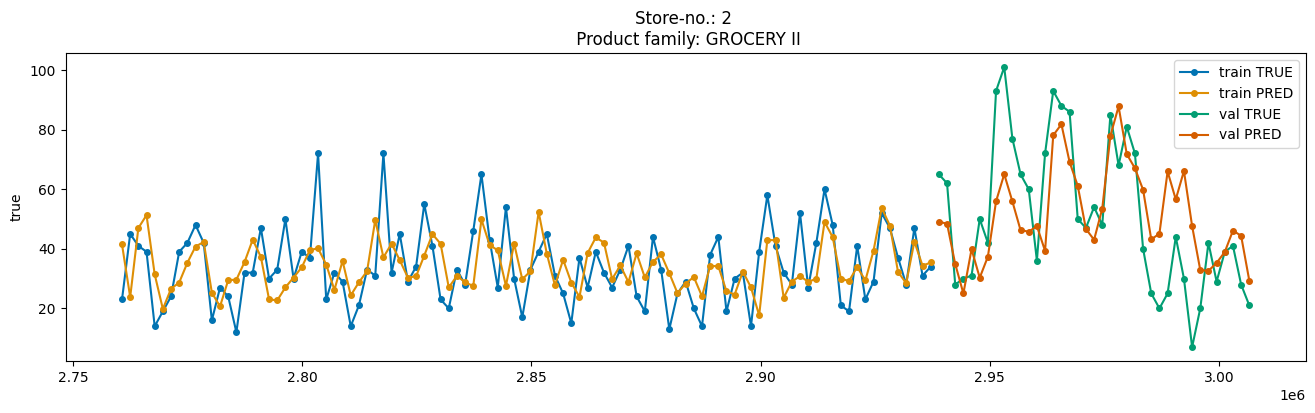

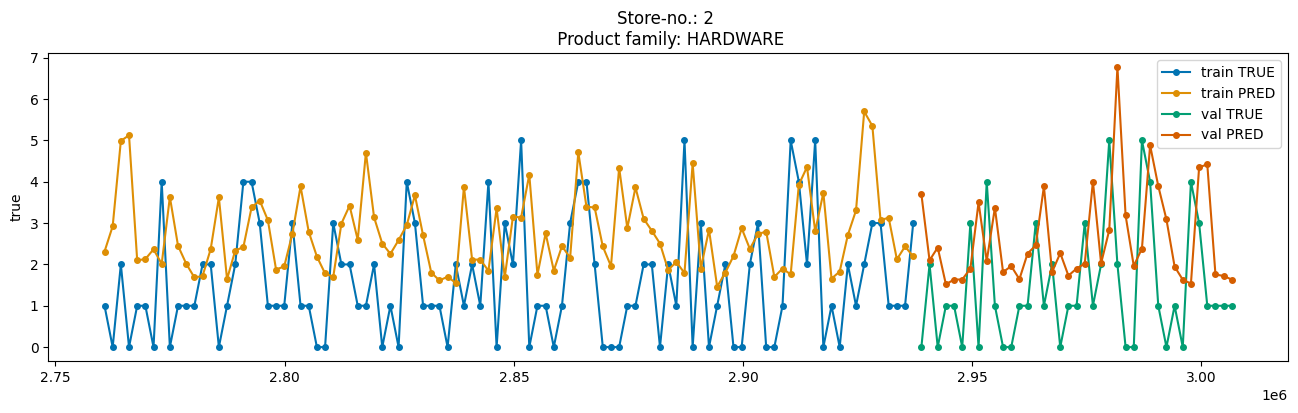

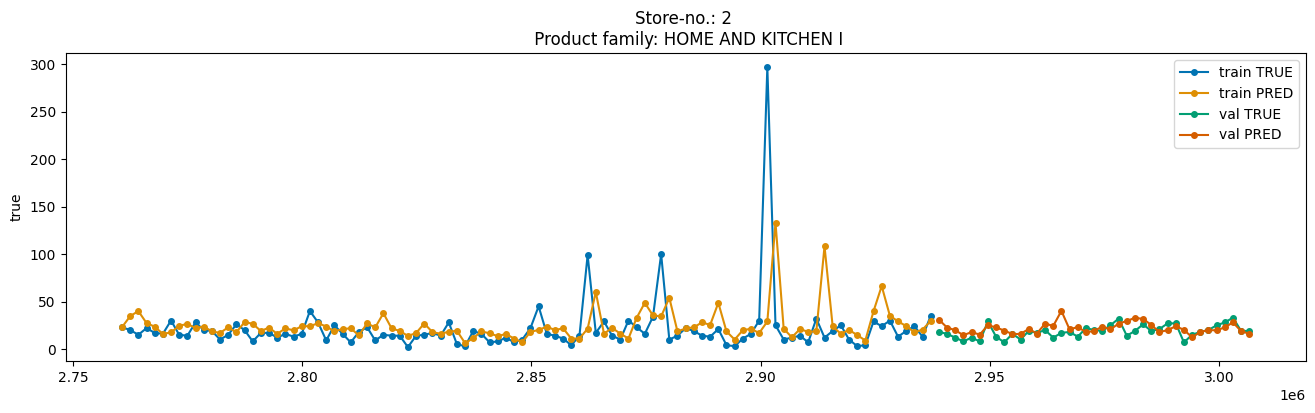

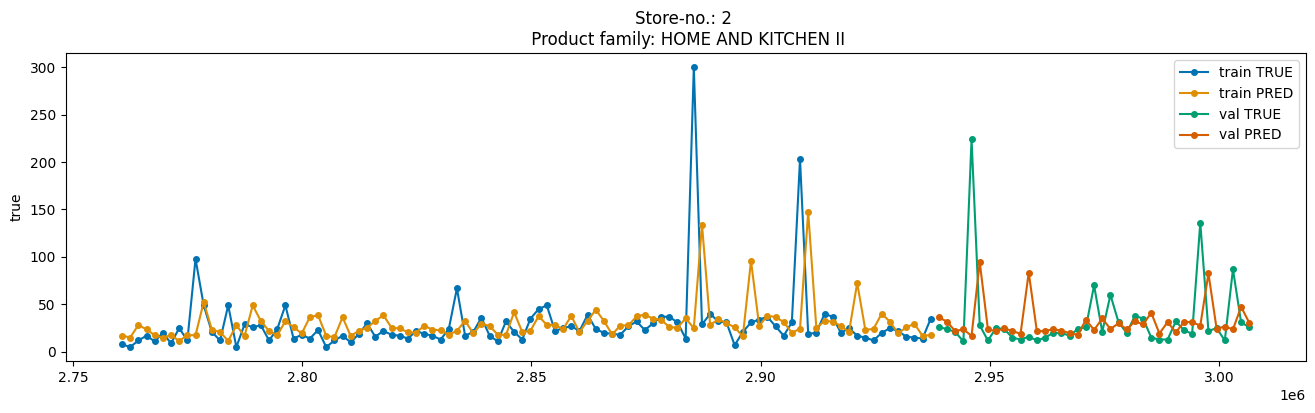

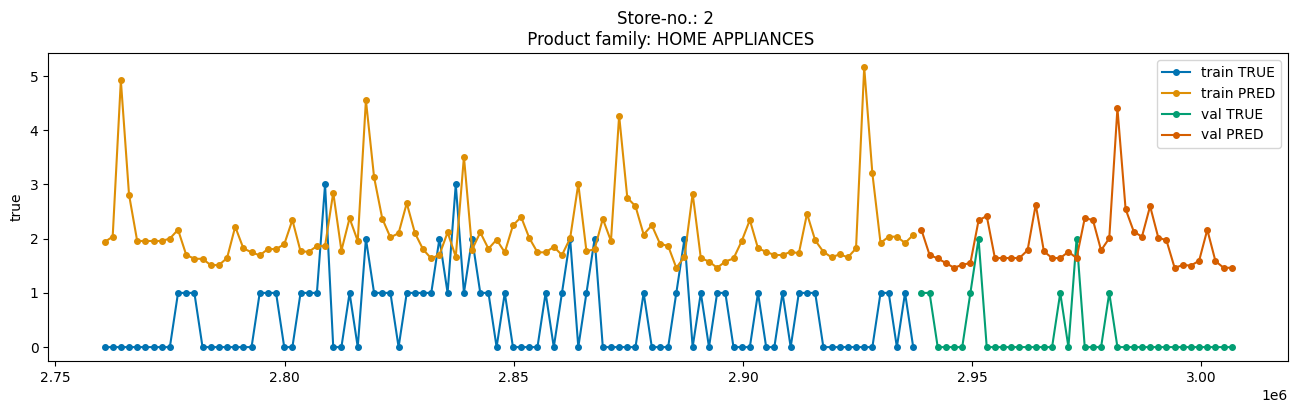

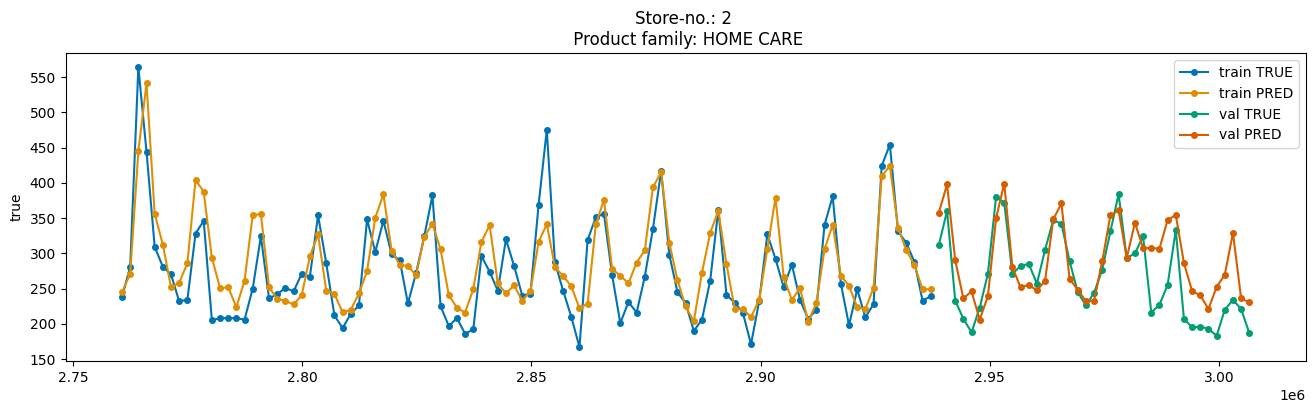

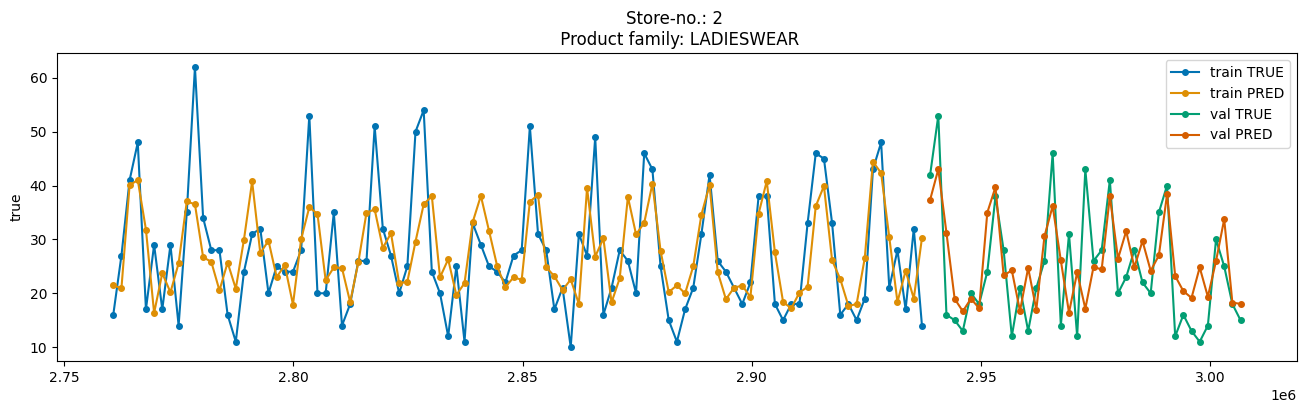

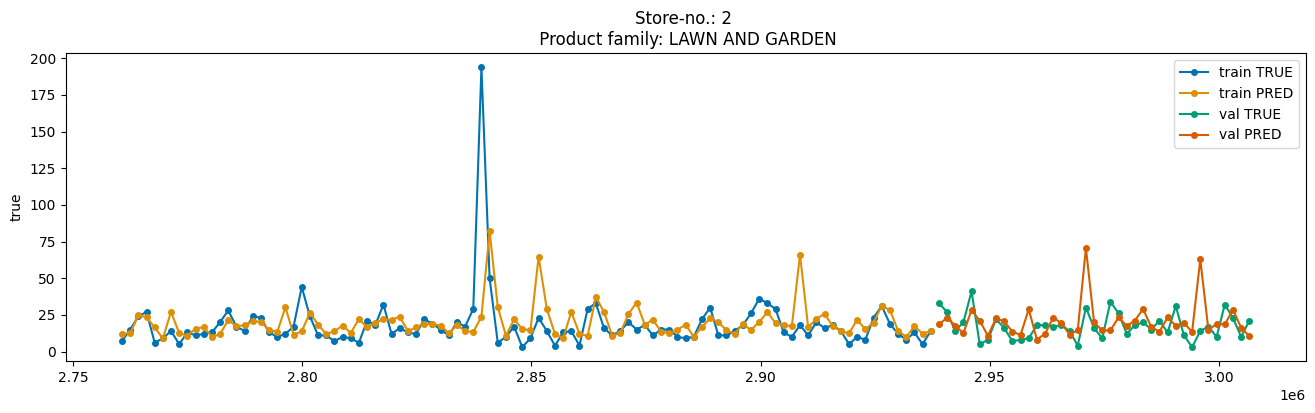

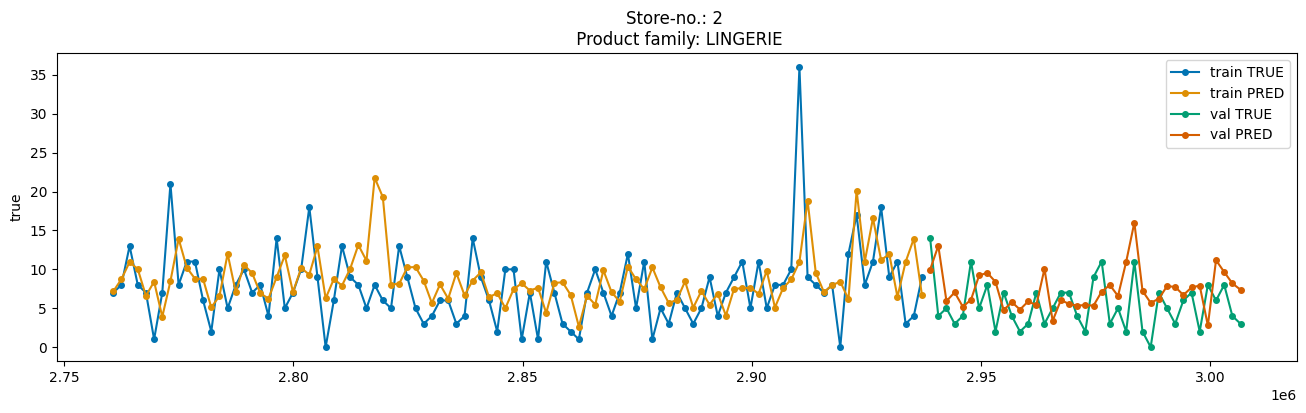

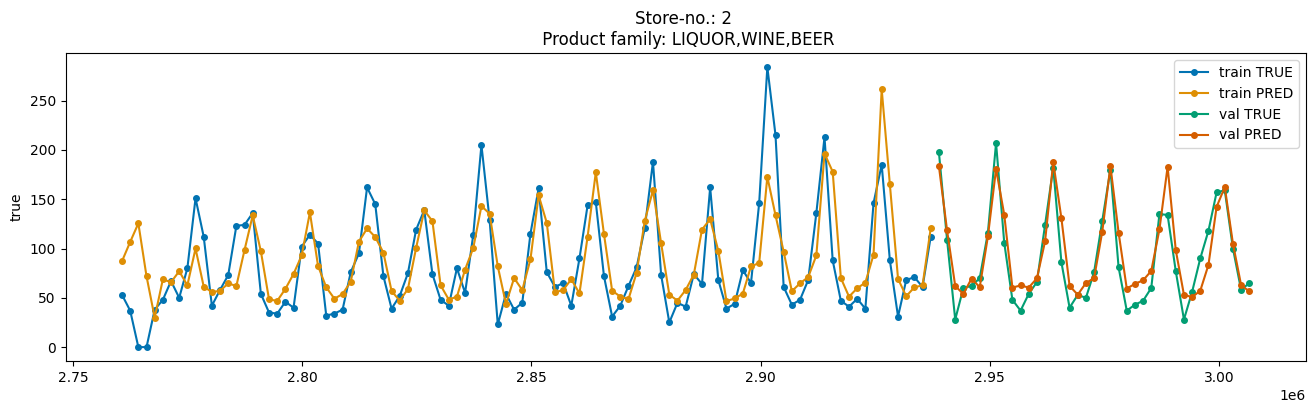

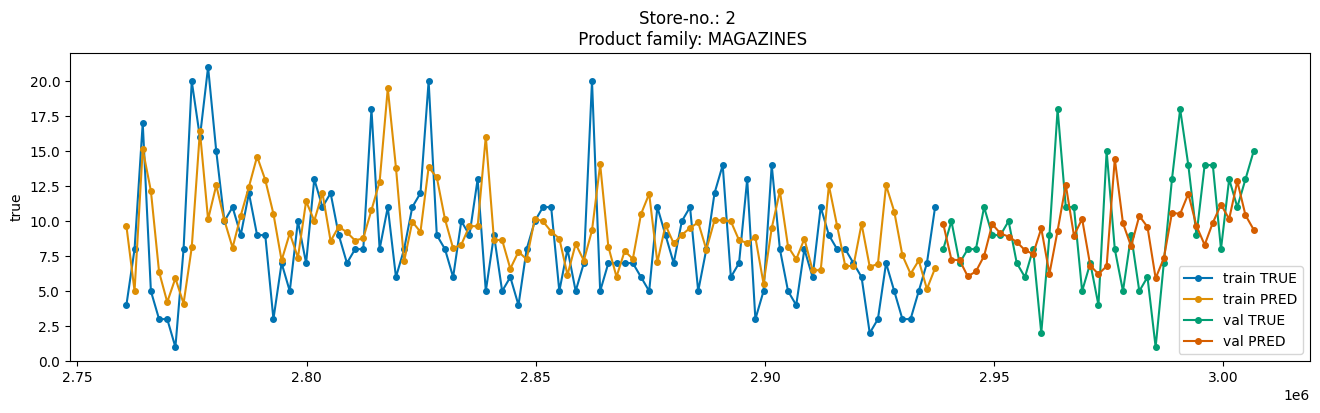

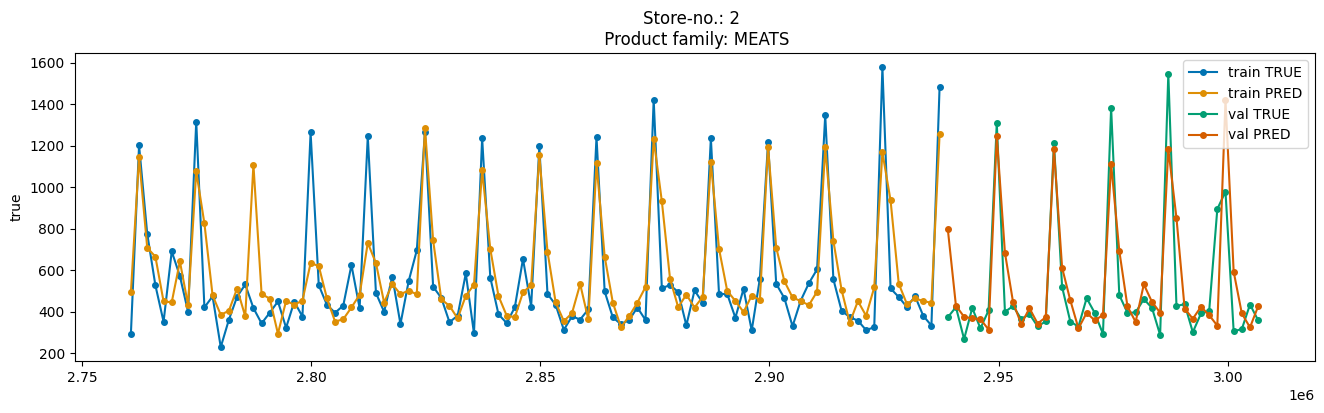

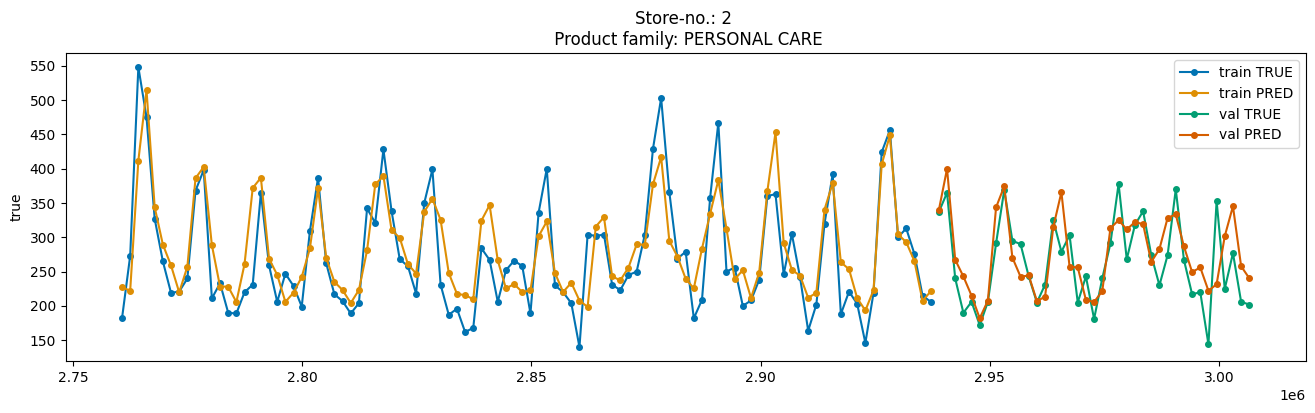

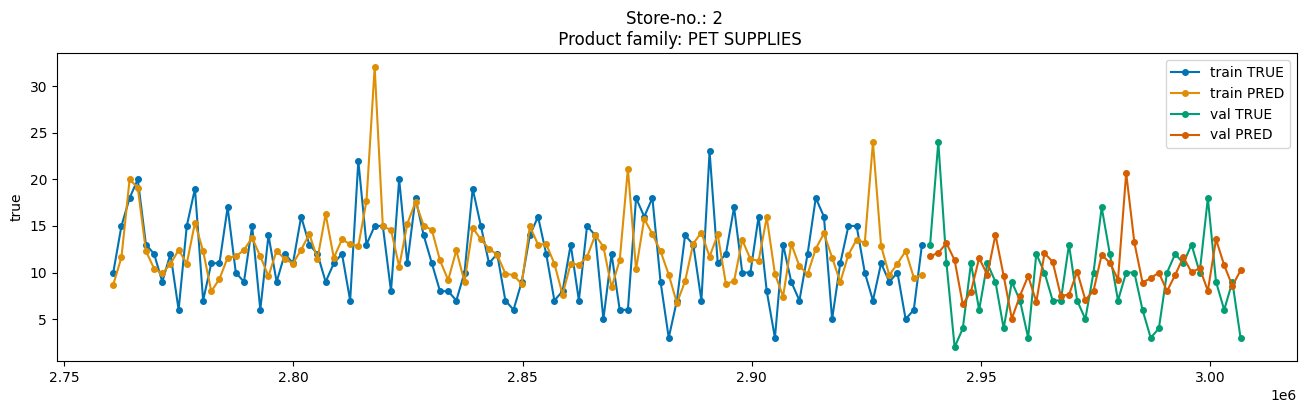

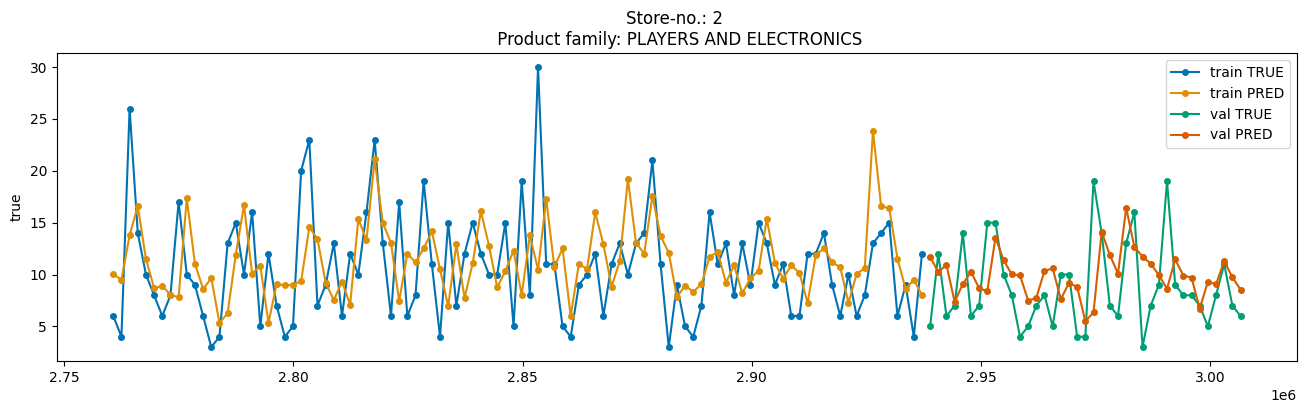

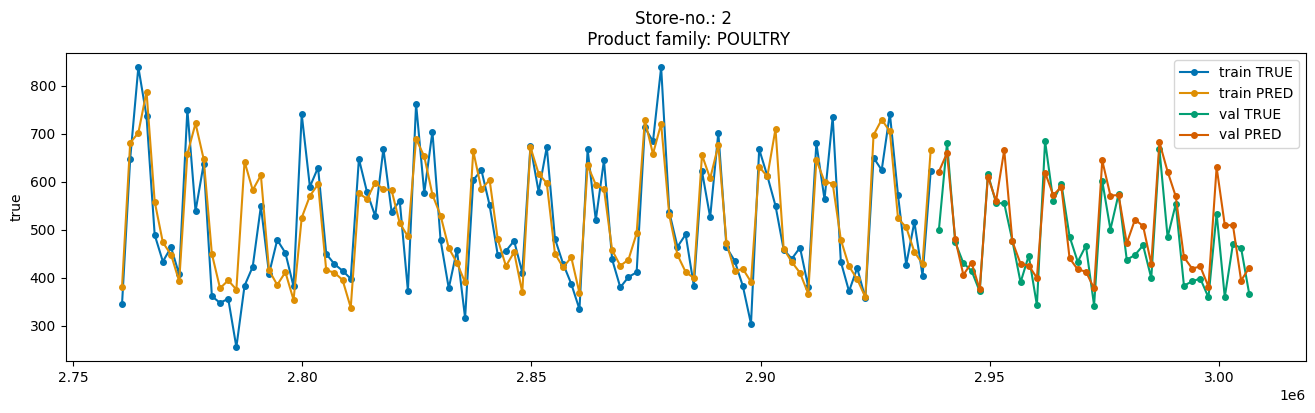

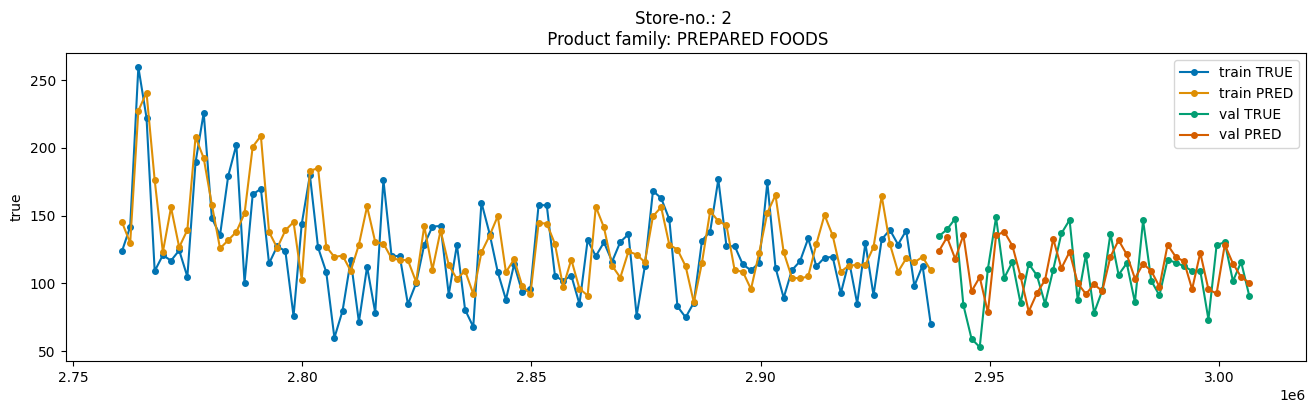

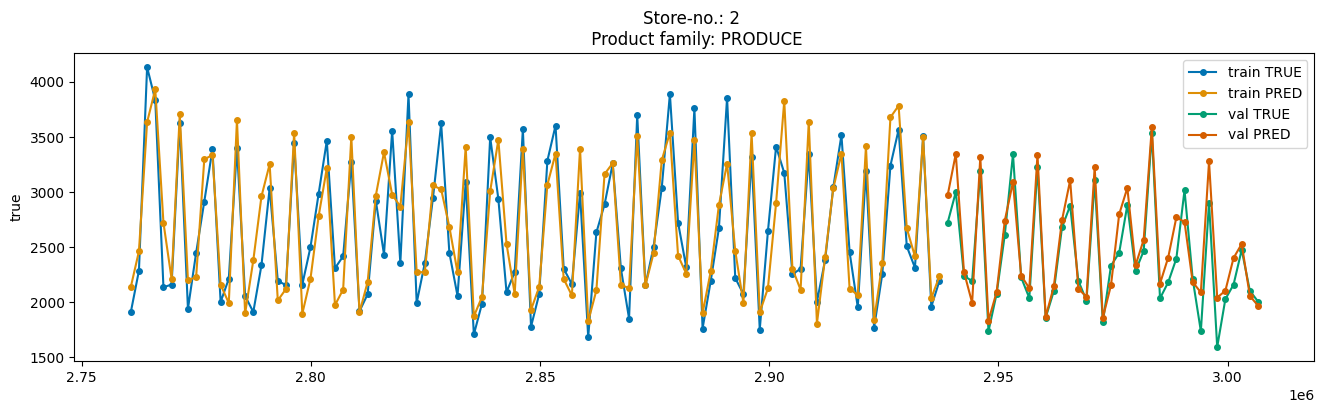

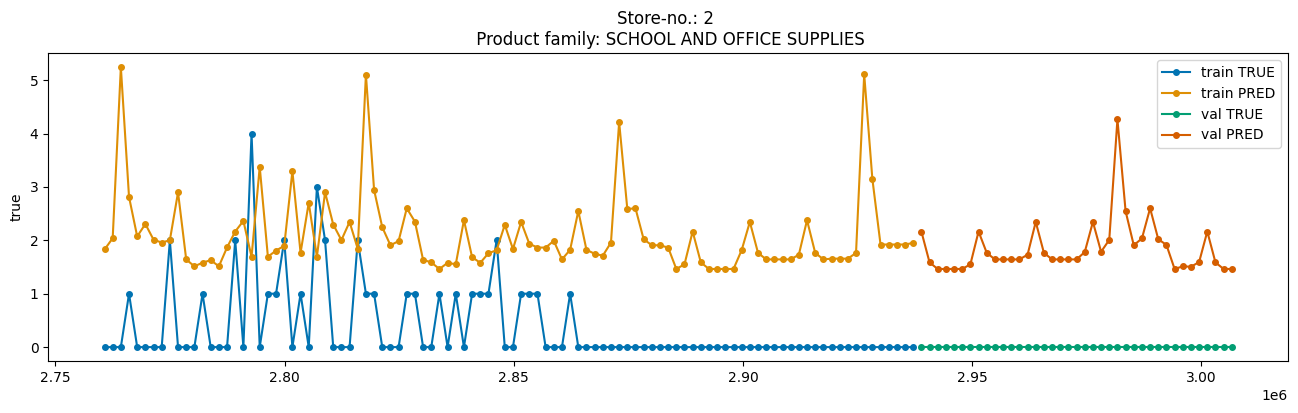

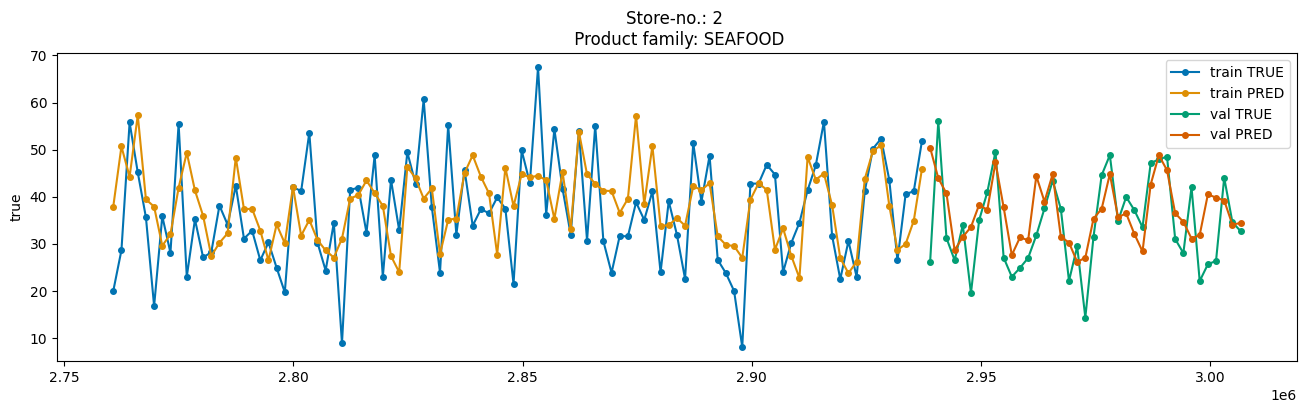

In [141]:
import matplotlib.pyplot as plt

for i in family:
    plot_results(dic_groups, 2, i)

## RandomSearch on new features

In [23]:
# Import necessary libraries
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import warnings

# Suppress warnings from XGBoost
warnings.filterwarnings("ignore", category=UserWarning)

# Updated feature list to include cyclic and interaction features
features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
            'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
            'week_of_year', 'time_since_last_promo', 'is_holiday', 
            'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_30', 
            'sales_lag_60', 'sales_lag_90',
            'promo_holiday', 'store_cluster_promo']

# Prepare the feature matrix and target variable
X = df_train[features]
y = df_train['sales']

# Step 1: Check for zero or negative sales values
def check_for_zero_negative_sales(df, target_column='sales'):
    num_invalid_sales = df[df[target_column] <= 0].shape[0]
    if num_invalid_sales > 0:
        print(f"Number of zero or negative sales: {num_invalid_sales}")
    else:
        print("No zero or negative sales found.")
    return num_invalid_sales

# Step 2: Handle zero or negative sales (either filter them or adjust by adding a constant)
def handle_zero_negative_sales(df, method='filter'):
    if method == 'filter':
        # Filter out zero or negative sales
        df_filtered = df[df['sales'] > 0]
        print(f"Filtered out rows with zero or negative sales. Remaining rows: {df_filtered.shape[0]}")
        return df_filtered
    elif method == 'add_constant':
        # Add a small constant to avoid zero or negative sales
        df['sales_adjusted'] = df['sales'] + 1
        print("Added constant of 1 to avoid zero or negative sales.")
        return df

# Step 3: Custom RMSLE scorer that clips negative predictions
def rmsle_scorer(y_true, y_pred):
    # Clip any negative predictions to 0 to avoid errors
    y_pred = np.clip(y_pred, a_min=0, a_max=None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Step 4: Perform Hyperparameter Tuning with RandomizedSearchCV
def perform_hyperparameter_tuning(X, y):
    # Ensure no zero or negative values in y before proceeding
    if (y <= 0).any():
        raise ValueError("Detected zero or negative values in target variable, can't proceed with RMSLE.")

    # Define the cleaned-up parameter grid for XGBoost
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'lambda': [0, 0.1, 1],  # L2 regularization
        'alpha': [0, 0.1, 1]  # L1 regularization
    }

    # Initialize XGBoost regressor
    xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=1000)

    # Custom RMSLE scorer with clipping
    rmsle = make_scorer(rmsle_scorer, greater_is_better=False)

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgboost_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=rmsle,  # Use custom RMSLE scorer
        cv=3,  # 3-fold cross-validation
        verbose=1,  # Set verbosity to 1 for progress updates
        random_state=42,
        n_jobs=-1
    )

    # Perform the random search on the filtered training data
    random_search.fit(X, y)

    # Output the best parameters and the corresponding RMSLE score
    print("Best hyperparameters:", random_search.best_params_)
    print("Best score (RMSLE):", np.sqrt(-random_search.best_score_))

# Step 5: Clip negative model predictions
def clip_predictions(predictions):
    return np.clip(predictions, a_min=0, a_max=None)

# Step 6: Prepare and run everything
# Check for zero or negative sales in the training data
check_for_zero_negative_sales(df_train)

# Handle zero or negative sales based on the chosen method (either filter or add_constant)
df_train_cleaned = handle_zero_negative_sales(df_train, method='filter')

# Prepare feature matrix and target variable for training
X_filtered = df_train_cleaned[features]  # Assuming features list is defined earlier
y_filtered = df_train_cleaned['sales']

# Step 7: Ensure all target values are positive before proceeding
try:
    if (y_filtered <= 0).any():
        raise ValueError("Zero or negative values found in the target data!")

    # Print statistics on the target variable
    print(f"Min sales value: {y_filtered.min()}, Max sales value: {y_filtered.max()}")
    
    # Perform hyperparameter tuning
    perform_hyperparameter_tuning(X_filtered, y_filtered)
    
except ValueError as e:
    print(f"Error: {e}")


Number of zero or negative sales: 940483
Filtered out rows with zero or negative sales. Remaining rows: 2067533
Min sales value: 0.122, Max sales value: 124717.0
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'lambda': 1, 'colsample_bytree': 0.9, 'alpha': 0.1}
Best score (RMSLE): 0.9999535667499928


## GridSearch on new features

In [22]:
# # Import necessary libraries
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, mean_squared_log_error
# import warnings

# # Suppress warnings from XGBoost
# warnings.filterwarnings("ignore", category=UserWarning)

# # Updated feature list to include cyclic and interaction features
# features = ['onpromotion', 'dcoilwtico', 'transactions', 'year', 'month', 'day', 
#             'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos',
#             'week_of_year', 'time_since_last_promo', 'is_holiday', 
#             'sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'sales_lag_30', 
#             'sales_lag_60', 'sales_lag_90',
#             'promo_holiday', 'store_cluster_promo']

# # Prepare the feature matrix and target variable
# X = df_train[features]
# y = df_train['sales']

# # Step 1: Check for zero or negative sales values
# def check_for_zero_negative_sales(df, target_column='sales'):
#     num_invalid_sales = df[df[target_column] <= 0].shape[0]
#     if num_invalid_sales > 0:
#         print(f"Number of zero or negative sales: {num_invalid_sales}")
#     else:
#         print("No zero or negative sales found.")
#     return num_invalid_sales

# # Step 2: Handle zero or negative sales (either filter them or adjust by adding a constant)
# def handle_zero_negative_sales(df, method='filter'):
#     if method == 'filter':
#         # Filter out zero or negative sales
#         df_filtered = df[df['sales'] > 0]
#         print(f"Filtered out rows with zero or negative sales. Remaining rows: {df_filtered.shape[0]}")
#         return df_filtered
#     elif method == 'add_constant':
#         # Add a small constant to avoid zero or negative sales
#         df['sales_adjusted'] = df['sales'] + 1
#         print("Added constant of 1 to avoid zero or negative sales.")
#         return df

# # Step 3: Custom RMSLE scorer that clips negative predictions
# def rmsle_scorer(y_true, y_pred):
#     # Clip any negative predictions to 0 to avoid errors
#     y_pred = np.clip(y_pred, a_min=0, a_max=None)
#     return np.sqrt(mean_squared_log_error(y_true, y_pred))

# # Step 4: Perform Hyperparameter Tuning with GridSearchCV
# def perform_hyperparameter_tuning(X, y):
#     # Ensure no zero or negative values in y before proceeding
#     if (y <= 0).any():
#         raise ValueError("Detected zero or negative values in target variable, can't proceed with RMSLE.")

#     # Define the cleaned-up parameter grid for XGBoost
#     param_grid = {
#         'max_depth': [3, 5, 7, 10],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'n_estimators': [100, 500, 1000],
#         'subsample': [0.7, 0.8, 0.9],
#         'colsample_bytree': [0.7, 0.8, 0.9],
#         'lambda': [0, 0.1, 1],  # L2 regularization
#         'alpha': [0, 0.1, 1]  # L1 regularization
#     }

#     # Initialize XGBoost regressor
#     xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=1000)

#     # Custom RMSLE scorer with clipping
#     rmsle = make_scorer(rmsle_scorer, greater_is_better=False)

#     # Set up GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=xgboost_model,
#         param_grid=param_grid,
#         scoring=rmsle,  # Use custom RMSLE scorer
#         cv=3,  # 3-fold cross-validation
#         verbose=1,  # Set verbosity to 1 for progress updates
#         n_jobs=-1
#     )

#     # Perform the grid search on the filtered training data
#     grid_search.fit(X, y)

#     # Output the best parameters and the corresponding RMSLE score
#     print("Best hyperparameters:", grid_search.best_params_)
#     print("Best score (RMSLE):", np.sqrt(-grid_search.best_score_))

# # Step 5: Clip negative model predictions
# def clip_predictions(predictions):
#     return np.clip(predictions, a_min=0, a_max=None)

# # Step 6: Prepare and run everything
# # Check for zero or negative sales in the training data
# check_for_zero_negative_sales(df_train)

# # Handle zero or negative sales based on the chosen method (either filter or add_constant)
# df_train_cleaned = handle_zero_negative_sales(df_train, method='filter')

# # Prepare feature matrix and target variable for training
# X_filtered = df_train_cleaned[features]  # Assuming features list is defined earlier
# y_filtered = df_train_cleaned['sales']

# # Step 7: Ensure all target values are positive before proceeding
# try:
#     if (y_filtered <= 0).any():
#         raise ValueError("Zero or negative values found in the target data!")

#     # Print statistics on the target variable
#     print(f"Min sales value: {y_filtered.min()}, Max sales value: {y_filtered.max()}")
    
#     # Perform hyperparameter tuning
#     perform_hyperparameter_tuning(X_filtered, y_filtered)
    
# except ValueError as e:
#     print(f"Error: {e}")


Number of zero or negative sales: 940483
Filtered out rows with zero or negative sales. Remaining rows: 2067533
Min sales value: 0.122, Max sales value: 124717.0
Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


KeyboardInterrupt: 